# Decompres Data

In [ ]:
!unzip -q "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/1mm B30 train.zip" -d "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train"

Archive:  /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/1mm B30 train.zip
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm.zip  
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/FD_1mm.zip  


In [ ]:
!unzip -q "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm.zip" -d "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm"

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm/quarter_1mm/L096/quarter_1mm/L096_QD_1_1.CT.0003.0393.2015.12.23.16.33.24.939651.360693313.IMA  
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm/quarter_1mm/L096/quarter_1mm/L096_QD_1_1.CT.0003.0394.2015.12.23.16.33.24.939651.360693337.IMA  
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm/quarter_1mm/L096/quarter_1mm/L096_QD_1_1.CT.0003.0395.2015.12.23.16.33.24.939651.360693361.IMA  
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD_1mm/quarter_1mm/L096/quarter_1mm/L096_QD_1_1.CT.0003.0396.2015.12.23.16.33.24.939651.360693385.IMA  
  inflating: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/QD

In [ ]:
!unzip -q "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/FD_1mm.zip" -d "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30/FD_1mm"

# Preprocessing

In [ ]:
!pip install -q pydicom datasets pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 26.6 MB/s eta 0:00:00


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Process data

In [ ]:
path = "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/1mm B30"

In [ ]:
qd_dataset = path + "/QD_1mm/quarter_1mm"
fd_dataset = path + "/FD_1mm/full_1mm"

In [ ]:
import os

patients = os.listdir(qd_dataset)
patients

['L286',
 'L291',
 'L310',
 'L333',
 'L506',
 'L067',
 'L096',
 'L109',
 'L143',
 'L192']

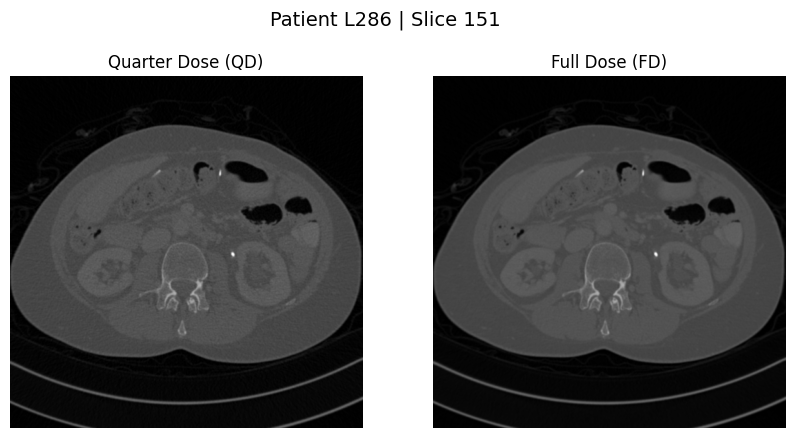

Patient L286 mean absolute difference (HU): 19.21


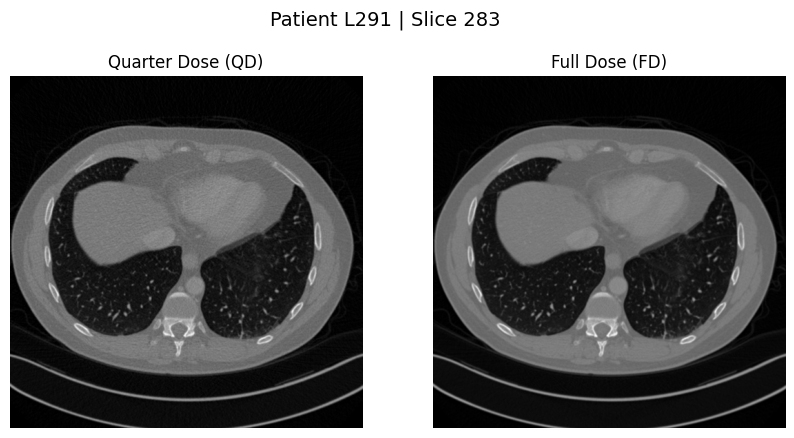

Patient L291 mean absolute difference (HU): 20.77


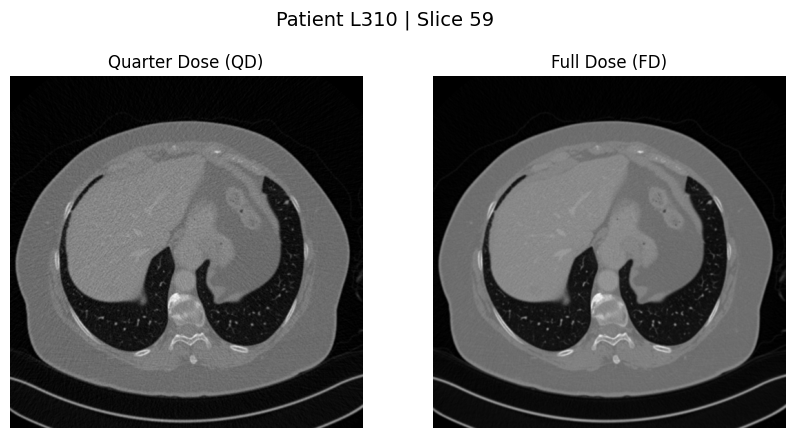

Patient L310 mean absolute difference (HU): 26.24


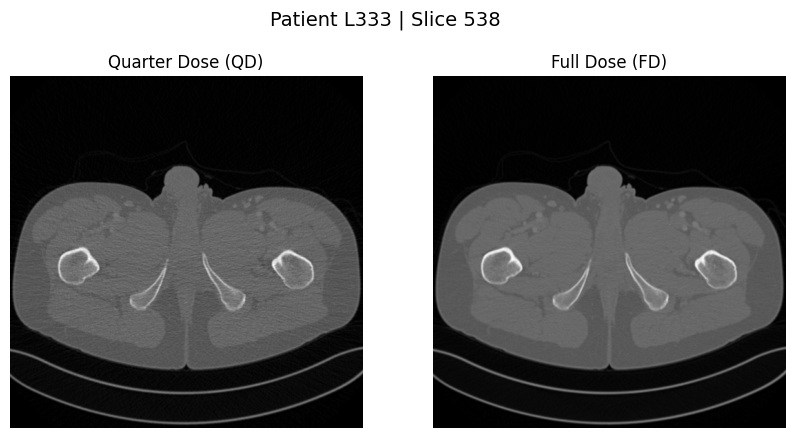

Patient L333 mean absolute difference (HU): 25.80


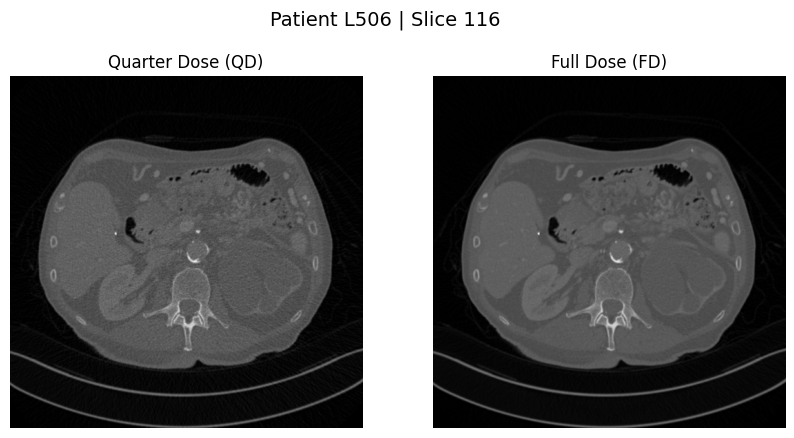

Patient L506 mean absolute difference (HU): 30.43


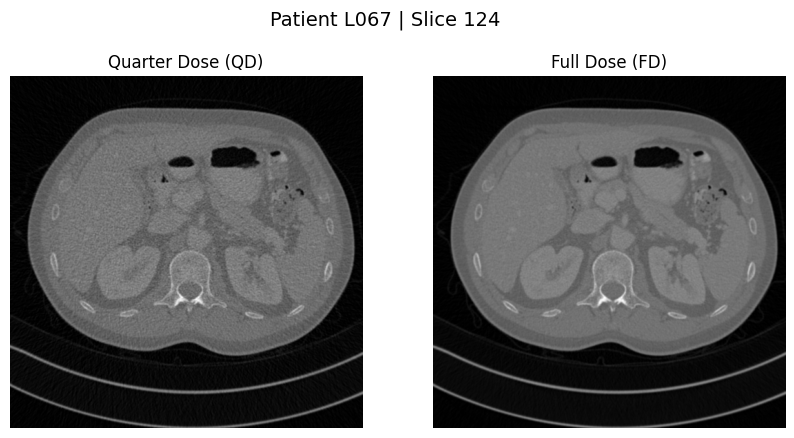

Patient L067 mean absolute difference (HU): 35.70


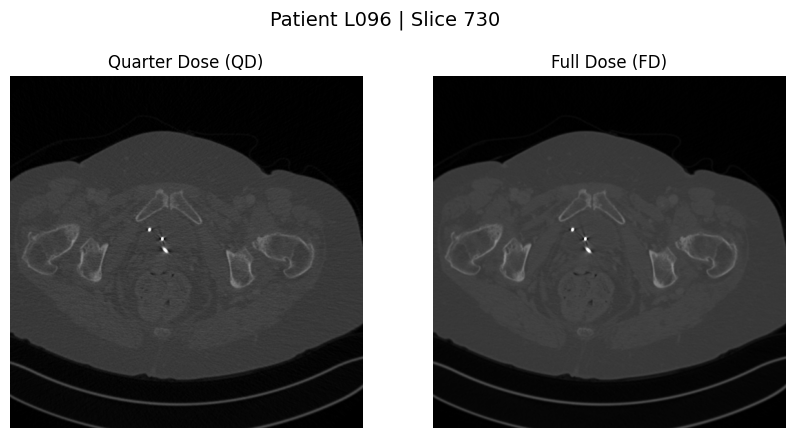

Patient L096 mean absolute difference (HU): 25.43


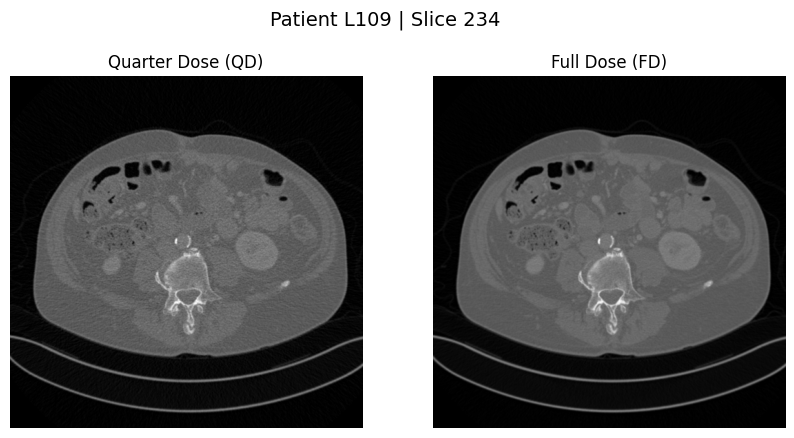

Patient L109 mean absolute difference (HU): 30.23


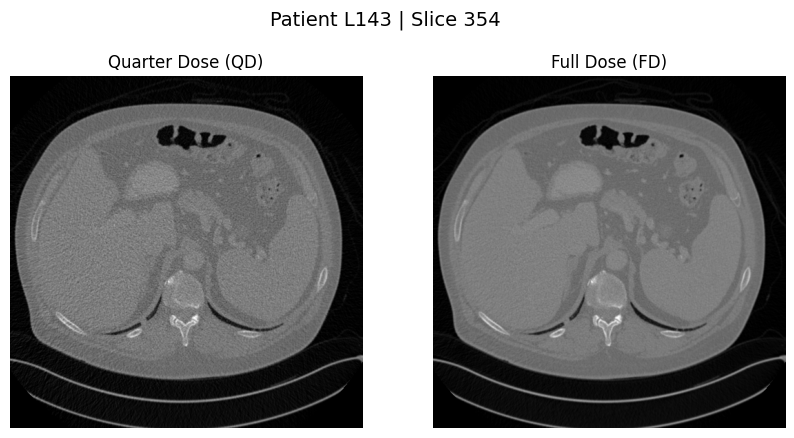

Patient L143 mean absolute difference (HU): 39.81


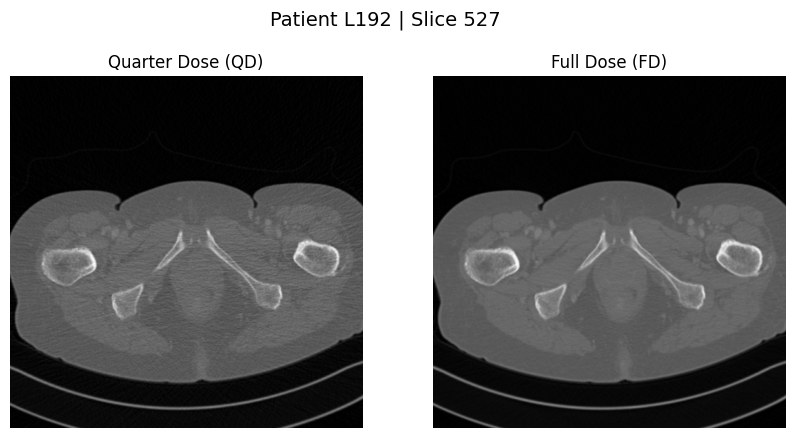

Patient L192 mean absolute difference (HU): 25.84


In [ ]:
import random
import pydicom
import numpy as np
import matplotlib.pyplot as plt

def convert_to_hu(dicom_file_array: list):
  hu = np.stack([s.pixel_array for s in dicom_file_array])
  hu = hu * dicom_file_array[0].RescaleSlope + dicom_file_array[0].RescaleIntercept
  return hu


for patient in patients:
  patient_qd_path = qd_dataset + "/" + patient + "/quarter_1mm"
  patient_fd_path = fd_dataset + "/" + patient + "/full_1mm"
  output_path = f"/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/{patient}"
  os.makedirs(output_path, exist_ok=True)

  qd_files = [pydicom.dcmread(os.path.join(patient_qd_path, f)) for f in os.listdir(patient_qd_path) if f.endswith(".IMA")]
  qd_files.sort(key=lambda x: int(x.InstanceNumber))
  qd_hu = convert_to_hu(qd_files)
  np.save(output_path + "/qd.npy", qd_hu)

  fd_files = [pydicom.dcmread(os.path.join(patient_fd_path, f)) for f in os.listdir(patient_fd_path) if f.endswith(".IMA")]
  fd_files.sort(key=lambda x: int(x.InstanceNumber))
  fd_hu = convert_to_hu(fd_files)
  np.save(output_path + "/fd.npy", fd_hu)

  # Compare any random slice
  max_slice = qd_hu.shape[0]
  slice_idx = random.randint(0, max_slice - 1)

  # --- Plot side by side ---
  plt.figure(figsize=(10, 5))
  plt.suptitle(f"Patient {patient} | Slice {slice_idx}", fontsize=14)

  plt.subplot(1, 2, 1)
  plt.title("Quarter Dose (QD)")
  plt.imshow(qd_hu[slice_idx], cmap="gray")
  plt.axis("off")

  plt.subplot(1, 2, 2)
  plt.title("Full Dose (FD)")
  plt.imshow(fd_hu[slice_idx], cmap="gray")
  plt.axis("off")

  plt.show()

  diff = np.abs(qd_hu[slice_idx] - fd_hu[slice_idx]).mean()
  print(f"Patient {patient} mean absolute difference (HU): {diff:.2f}")

In [ ]:
random.shuffle(patients)
train_patients = patients[:8]
test_patients  = patients[8:]

print("Train:", train_patients)
print("Test :", test_patients)

Train: ['L286', 'L192', 'L067', 'L506', 'L109', 'L096', 'L291', 'L143']
Test : ['L333', 'L310']


In [ ]:
from datasets import Dataset, Features, Value, Array2D
import numpy as np
import os

# Define schema
features = Features({
    "patient": Value("string"),
    "slice_idx": Value("int32"),
    "qd": Array2D(dtype="float32", shape=(512, 512)),
    "fd": Array2D(dtype="float32", shape=(512, 512)),
})

# Generator to stream CT slices per patient
def ct_generator(patient_list):
    for p in patient_list:
        qd = np.load(f"/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/{p}/qd.npy").astype("float32")
        fd = np.load(f"/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/train/{p}/fd.npy").astype("float32")
        assert qd.shape == fd.shape

        for i in range(qd.shape[0]):
            yield {
                "patient": p,
                "slice_idx": i,
                "qd": qd[i],
                "fd": fd[i]
            }

# Build and save dataset to drive
def build_and_save(patient_list, save_name):
    ds = Dataset.from_generator(
        ct_generator, gen_kwargs={"patient_list": patient_list},
        features=features
    )

    save_path = f"/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/{save_name}"
    ds.save_to_disk(save_path)
    print(f"✅ Saved dataset to: {save_path}")

build_and_save(train_patients, "ct_denoise_train")
build_and_save(test_patients,  "ct_denoise_test")

Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/21 shards):   0%|          | 0/4793 [00:00<?, ? examples/s]

✅ Saved dataset to: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train


Generating train split: 0 examples [00:00, ? examples/s]

Saving the dataset (0/5 shards):   0%|          | 0/1143 [00:00<?, ? examples/s]

✅ Saved dataset to: /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_test


In [ ]:
!zip -r -9 "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train.zip" \
      "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train" \
      -x "*/.ipynb_checkpoints/*" "*/__pycache__/*"
!zip -r -9 "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_test.zip" \
      "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_test" \
      -x "*/.ipynb_checkpoints/*" "*/__pycache__/*"

  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/ (stored 0%)
  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00000-of-00021.arrow (deflated 66%)
  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00001-of-00021.arrow (deflated 66%)
  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00002-of-00021.arrow (deflated 65%)
  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00003-of-00021.arrow (deflated 67%)
  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00004-of-00021.arrow (deflated 67%)
  adding: content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00005-of-00021.arrow (deflated 64%)
  adding: content/drive/MyD

Test unzip

In [ ]:
!unzip -l "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train.zip"
!unzip -l "/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_test.zip"

Archive:  /content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-11-09 14:44   content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/
481192104  2025-11-09 13:08   content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00000-of-00021.arrow
481192104  2025-11-09 13:08   content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00001-of-00021.arrow
481192104  2025-11-09 13:08   content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00002-of-00021.arrow
481192104  2025-11-09 13:08   content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train/data-00003-of-00021.arrow
481192064  2025-11-09 13:08   content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_

# Data Loading

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from datasets import load_from_disk

train_ds = load_from_disk("/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_train")
test_ds = load_from_disk("/content/drive/MyDrive/AI604 Deep Learning for Computer Vision/Project/data/ct_denoise_test")

Loading dataset from disk:   0%|          | 0/21 [00:00<?, ?it/s]

## View the Data

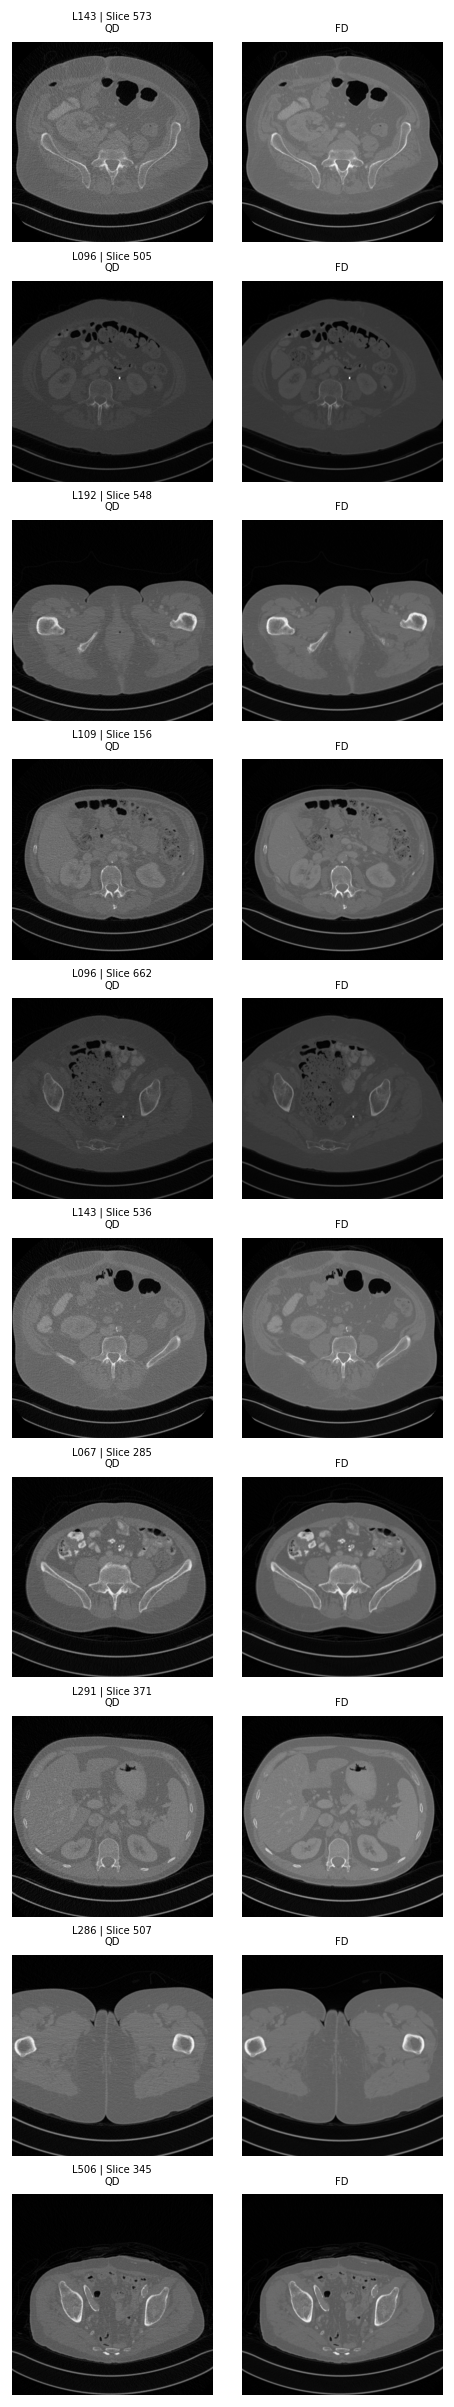

In [ ]:
import random
import matplotlib.pyplot as plt
from datasets import load_from_disk

# Pick 10 random indices
rand_indices = random.sample(range(len(train_ds)), 10)

# Configure figure (each row = 2 images: QD and FD)
fig, axes = plt.subplots(10, 2, figsize=(4, 20), dpi=120)  # make overall figure compact

for row, idx in enumerate(rand_indices):
    sample = train_ds[idx]

    qd_img = sample["qd"]
    fd_img = sample["fd"]
    pid = sample["patient"]
    sidx = sample["slice_idx"]

    # QD image
    axes[row, 0].imshow(qd_img, cmap="gray")
    axes[row, 0].set_title(f"{pid} | Slice {sidx}\nQD", fontsize=6)
    axes[row, 0].axis("off")

    # FD image
    axes[row, 1].imshow(fd_img, cmap="gray")
    axes[row, 1].set_title("FD", fontsize=6)
    axes[row, 1].axis("off")

plt.tight_layout(pad=0.5)
plt.show()
